In [1]:
import os
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.regularizers import  l2
IMAGE_SIZE = [224,224]
validation_path = os.path.abspath(r"C:\Users\mdbar\Desktop\Python\Flower_Image_Classification\preprocessed_flower_dataset\validation_preprocessed")
training_path = os.path.abspath(r"C:\Users\mdbar\Desktop\Python\Flower_Image_Classification\preprocessed_flower_dataset\train_preprocessed")

In [2]:
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np

# Load the MobileNet model pre-trained on ImageNet dataset
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of all layers except the last few
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer and output layer for jujube species classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(units=5, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Print the model summary
model.summary()



17225924/17225924 [==============================] - 10s 1us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

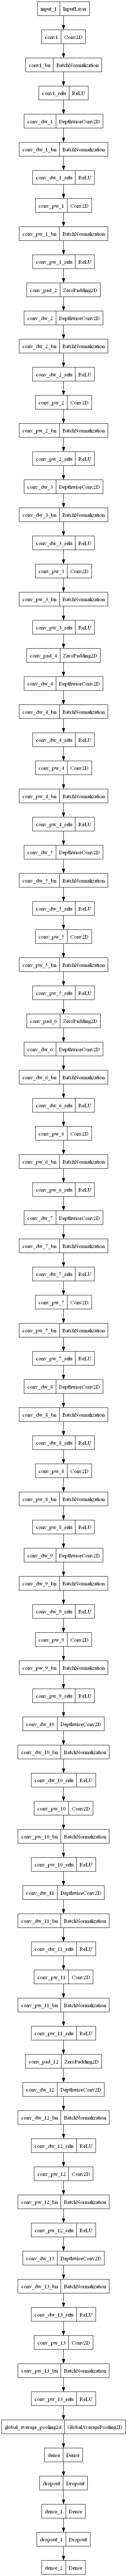

In [3]:
from keras.utils import plot_model
plot_model(model,to_file = "model_3_mobilenet.png")

In [3]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (224,224),batch_size = 32,)
validation_dataset = test_datagen.flow_from_directory(validation_path,target_size = (224,224),batch_size = 32,)

Found 14160 images belonging to 5 classes.
Found 320 images belonging to 5 classes.


In [5]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("model_2_MobileNet.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max')

In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    "model_2_MobileNet.h5",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    save_freq='epoch'  # or 'batch' depending on your preference
)

early = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=20,
    verbose=1,
    mode='max'
)

In [5]:
s = time.time()
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(validation_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/10



443/443 [==============================] - ETA: 0s - loss: 0.7615 - accuracy: 0.7034
Epoch 1: val_accuracy improved from -inf to 0.78125, saving model to model_2_MobileNet.h5


C:\Users\mdbar\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


443/443 [==============================] - 231s 515ms/step - loss: 0.7615 - accuracy: 0.7034 - val_loss: 0.6307 - val_accuracy: 0.7812
Epoch 2/10
443/443 [==============================] - ETA: 0s - loss: 0.5474 - accuracy: 0.7928
Epoch 2: val_accuracy did not improve from 0.78125
443/443 [==============================] - 230s 518ms/step - loss: 0.5474 - accuracy: 0.7928 - val_loss: 0.6109 - val_accuracy: 0.7719
Epoch 3/10
443/443 [==============================] - ETA: 0s - loss: 0.4594 - accuracy: 0.8254
Epoch 3: val_accuracy improved from 0.78125 to 0.78438, saving model to model_2_MobileNet.h5
443/443 [==============================] - 248s 560ms/step - loss: 0.4594 - accuracy: 0.8254 - val_loss: 0.6089 - val_accuracy: 0.7844
Epoch 4/10
443/443 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8470
Epoch 4: val_accuracy improved from 0.78438 to 0.80625, saving model to model_2_MobileNet.h5
443/443 [==============================] - 251s 566ms/step - loss: 0.4

In [6]:
print("time taken: ",time.time()-s)

time taken:  2879.288416862488


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


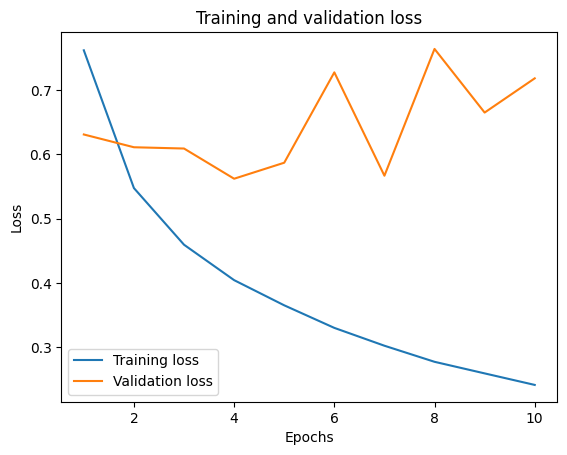

In [7]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

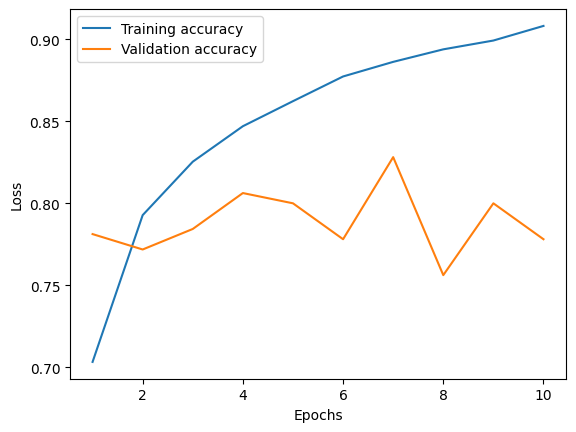

In [8]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
import pandas as pd
his_df = pd.DataFrame(history_dict)

In [11]:
pip install openpyxl


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 262.6 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 219.4 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 219.4 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/250.0 kB 219.4 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 241.3 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/250.0 kB 241.3 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 218.5 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 218.5 kB/s eta 

In [12]:
his_df.to_excel('model_2Mobilenet.xlsx',index=False)